In [2]:
import pandas as pd

df_past = pd.read_csv("../data/second_3_games.csv")
df = pd.read_csv("../data/special-la-game.csv")

df.head()

,time_frame,goals_for_avg,goals_against_avg,shots_on_target_%,crosses,poss_%,pass_success_rate,num_pass_strings,avg_pass_string,3_to_5_PS,6_plus_PS,atk_third_pass_success_%,pass_attempts_atk,pass_attempts_mid,mid_third_pass_success_%,def_third_pass_success_%,pass_attempts_def
0,0-15,0,0,0,1,43.5,66,5,4.2,4,1,73,15,47,64,67,6
1,16-30,0,0,0,2,42.3,69,5,3.6,5,0,0,1,29,72,68,22
2,31-45,0,0,0,2,35.0,61,1,3.0,1,0,67,3,13,69,43,7
3,46-60,0,0,0,0,39.4,58,2,3.5,2,0,33,3,27,59,67,3
4,61-75,0,0,0,0,35.1,58,2,3.5,2,0,100,2,13,69,36,11


Text(0.5, 0, 'Time in game')

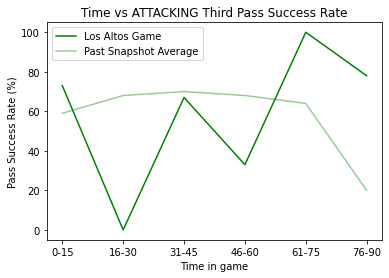

In [23]:
import matplotlib.pyplot as plt
# tend to drop off at 31-45 minutes
# plt.plot(df['time_frame'], df['mid_third_pass_success_%'],
#          label="Los Altos Game", color="b")
plt.plot(df['time_frame'], df['atk_third_pass_success_%'],
         label="Los Altos Game", color="g")
# plt.plot(df['time_frame'], df['def_third_pass_success_%'],
#          label="Los Altos Game", color="y")

# plt.plot(df_past['time_frame'], df_past['mid_third_pass_success_%'],
#          label="Past Snapshot Average", color="b", alpha=0.4)
plt.plot(df_past['time_frame'], df_past['atk_third_pass_success_%'],
         label="Past Snapshot Average", color="g", alpha=0.4)
# plt.plot(df_past['time_frame'], df_past['def_third_pass_success_%'],
#          label="Past Snapshot Average", color="y", alpha=0.5)


# plt.axvline(x="61-75", color='r', linestyle='--',
#             label='Previous Most Goals Against')

plt.title('Time vs ATTACKING Third Pass Success Rate')
plt.legend()
plt.ylabel('Pass Success Rate (%)')
plt.xlabel('Time in game')

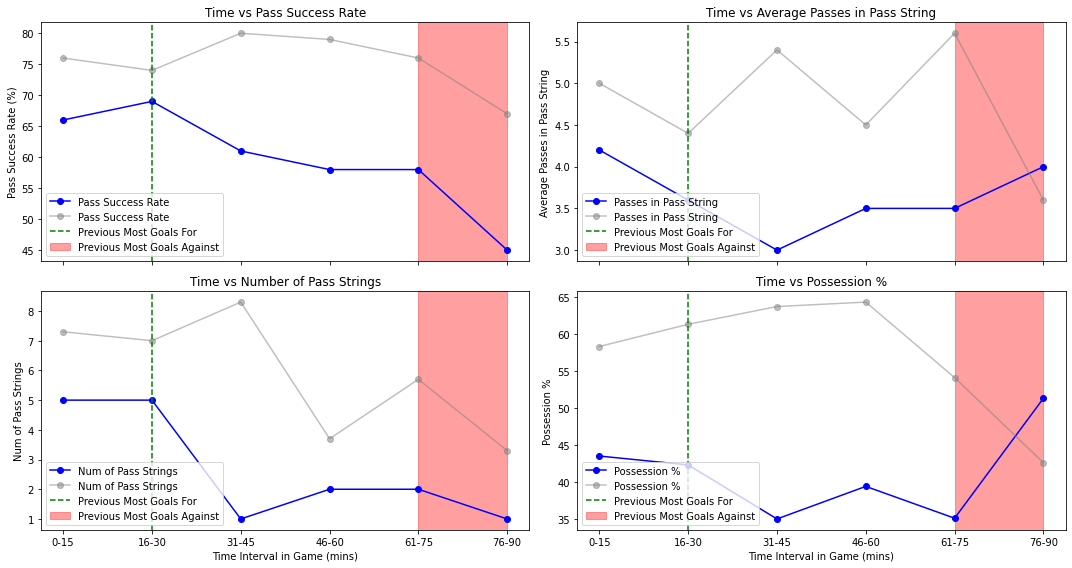

In [12]:
def plot_possession_graphs(top_time_against, top_time_for):
    fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

    axes[0, 0].plot(df['time_frame'], df['pass_success_rate'],
                    label="Pass Success Rate", marker='o', color='b')
    axes[0, 0].plot(df_past['time_frame'], df_past['pass_success_rate'],
                    label="Pass Success Rate", marker='o', color='gray', alpha=0.5)
    axes[0, 0].set_ylabel('Pass Success Rate (%)')
    axes[0, 0].set_title('Time vs Pass Success Rate')

    axes[1, 0].plot(df['time_frame'], df['num_pass_strings'],
                    label="Num of Pass Strings", marker='o', color='b')
    axes[1, 0].plot(df_past['time_frame'], df_past['num_pass_strings'],
                    label="Num of Pass Strings", marker='o', color='gray', alpha=0.5)
    axes[1, 0].set_title('Time vs Number of Pass Strings')
    axes[1, 0].set_ylabel('Num of Pass Strings')

    axes[0, 1].plot(df['time_frame'], df['avg_pass_string'],
                    label="Passes in Pass String", marker='o', color='b')
    axes[0, 1].plot(df_past['time_frame'], df_past['avg_pass_string'],
                    label="Passes in Pass String", marker='o', color='gray', alpha=0.5)
    axes[0, 1].set_title('Time vs Average Passes in Pass String')
    axes[0, 1].set_ylabel('Average Passes in Pass String')

    axes[1, 1].plot(df['time_frame'], df['poss_%'],
                    label="Possession %", marker='o', color='b')
    axes[1, 1].plot(df_past['time_frame'], df_past['poss_%'],
                    label="Possession %", marker='o', color='gray', alpha=0.5)
    axes[1, 1].set_title('Time vs Possession %')
    axes[1, 1].set_ylabel('Possession %')

    if (type(top_time_against) == list):
        for i in range(0, 2):
            for j in range(0, 2):
                axes[i, j].axvspan(top_time_against[0], top_time_against[1], color="#ff4040",
                                   alpha=0.5, label="Previous Most Goals Against")
    elif (type(top_time_against) == str):
        for i in range(0, 2):
            for j in range(0, 2):
                axes[i, j].axvline(x=top_time_against, color='r', linestyle='--',
                                   label='Previous Most Goals Against')
    if (type(top_time_for) == list):
        for i in range(0, 2):
            for j in range(0, 2):
                axes[i, j].axvspan(top_time_for[0], top_time_for[1], color="#ff4040",
                                   alpha=0.5, label="Previous Most Goals Against")
    elif (type(top_time_for) == str):
        for i in range(0, 2):
            for j in range(0, 2):
                axes[i, j].axvline(x=top_time_for, color='g', linestyle='--',
                                   label='Previous Most Goals For')
    for i in range(0, 2):
        for j in range(0, 2):
            if (i != 0):
                # to make sure there are shared x-labels
                axes[i, j].set_xlabel('Time Interval in Game (mins)')
            axes[i, j].legend(loc='lower left')

    plt.tight_layout()
    plt.show()


plot_possession_graphs(["61-75", "76-90"], "16-30")